In [2]:
import os
import sys
import matplotlib.pyplot as plt 
import numpy as np
import uproot

In [3]:
files = os.listdir(".")

In [4]:
files

['VBF_HToBB_GEN_13p6TeV_LHE_3_.root', 'Untitled.ipynb', '.ipynb_checkpoints']

In [5]:
vbf_file_path = 'VBF_HToBB_GEN_13p6TeV_LHE_3_.root'

In [7]:
vbf_uproot = uproot.open(vbf_file_path)

In [9]:
vbf_np_array = vbf_uproot.get("myEDAnalyzer/mytuple").arrays(library = "np")

In [10]:
vbf_np_array.keys()

dict_keys(['weight', 'higgs_pt', 'higgs_eta', 'higgs_phi', 'higgs_en', 'higgs_mbb', 'q1_pt', 'q1_eta', 'q1_phi', 'q1_en', 'q2_pt', 'q2_eta', 'q2_phi', 'q2_en', 'b_pt', 'b_eta', 'b_phi', 'b_en', 'bbar_pt', 'bbar_eta', 'bbar_phi', 'bbar_en', 'pt0_pt', 'pt0_eta', 'pt0_phi', 'pt0_en', 'pt1_pt', 'pt1_eta', 'pt1_phi', 'pt1_en', 'pt2_pt', 'pt2_eta', 'pt2_phi', 'pt2_en', 'pt3_pt', 'pt3_eta', 'pt3_phi', 'pt3_en', 'detabbbar', 'dphibbbar', 'dpt', 'detaq1q2', 'dphiq1q2', 'mq1q2', 'q1in_pt', 'q1in_eta', 'q1in_phi', 'q1in_e', 'q2in_pt', 'q2in_eta', 'q2in_phi', 'q2in_e'])

In [13]:
len(vbf_np_array)

52

In [14]:
vbf_np_array['higgs_pt'].shape

(1000000,)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cms_hist(data, nbins, hist_range, xlabel, legend_label,  varname=None, color='C0', save=True,process_tag=None):
    """
    Plot a CMS-style normalized histogram.

    Parameters
    ----------
    data : np.ndarray
        Array of values to histogram.
    nbins : int
        Number of bins.
    hist_range : tuple
        (min, max) range for histogram.
    xlabel : str
        Label for the x-axis.
    legend_label : str
        Label for the legend.
    color : str, optional
        Color of the histogram (default='C0').
    """

    # Normalize histogram
    counts, bins = np.histogram(data, bins=nbins, range=hist_range)
    
    bin_width = bins[1] - bins[0]
    counts = counts / (np.sum(counts) )  # normalize to unit area
    #print(f"total count is {np.sum(counts)}")
    # Plot
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.hist(bins[:-1], bins=bins, weights=counts, histtype='step', linewidth=2, color=color, label=legend_label)

    # Axis labels
    ax.set_xlabel(xlabel, fontsize=16,loc='right')
    ax.set_ylabel('Normalized to unity', fontsize=16)

    # Text: CMS Preliminary + energy
    ax.text(0.02, 1.02, r'$\bf{CMS}$ Preliminary', transform=ax.transAxes, fontsize=16, va='bottom', ha='left')
    ax.text(0.98, 1.02, r'13.6 TeV', transform=ax.transAxes, fontsize=16, va='bottom', ha='right')

    # Legend
    if process_tag:
        ax.text(0.04, 0.90, process_tag, transform=ax.transAxes,
            fontsize=16, va='bottom', ha='left', color='black')
    if legend_label:
        ax.legend(frameon=False, fontsize=14)

    # Styling
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True, labelsize=14)
    ax.set_xlim(hist_range)
    ax.set_ylim(0, ax.get_ylim()[1]*1.3)
    ax.grid(True)

    plt.tight_layout()
    if save and varname is not None:
        fname = f"vbf_kin_{varname}.pdf"
        plt.savefig(fname)
        fname = f"vbf_kin_{varname}.png"
        plt.savefig(fname)
        print(f"✅ Saved: {fname}")
    plt.show()

# Example usage:
# data = np.random.normal(0, 1, 10000)
# plot_cms_hist(data, nbins=50, hist_range=(-5,5), xlabel='Variable X', legend_label='Signal MC')


In [77]:
def eta_to_rapidity(eta, pt, mass = 125):
    """
    Convert pseudorapidity (eta) to rapidity (y) for a particle.

    Parameters:
    eta : numpy array
        Pseudorapidity
    pt : numpy array or float
        Transverse momentum
    mass : float
        Particle mass

    Returns:
    y : numpy array
        Rapidity
    """
    pt = np.array(pt)  # ensure numpy array
    eta = np.array(eta)
    mT = np.sqrt(mass**2 + pt**2)  # transverse mass
    y = 0.5 * np.log((mT * np.cosh(eta) + pt * np.sinh(eta)) / 
                     (mT * np.cosh(eta) - pt * np.sinh(eta)))
    return y

✅ Saved: vbf_kin_higgs_rapidity.png


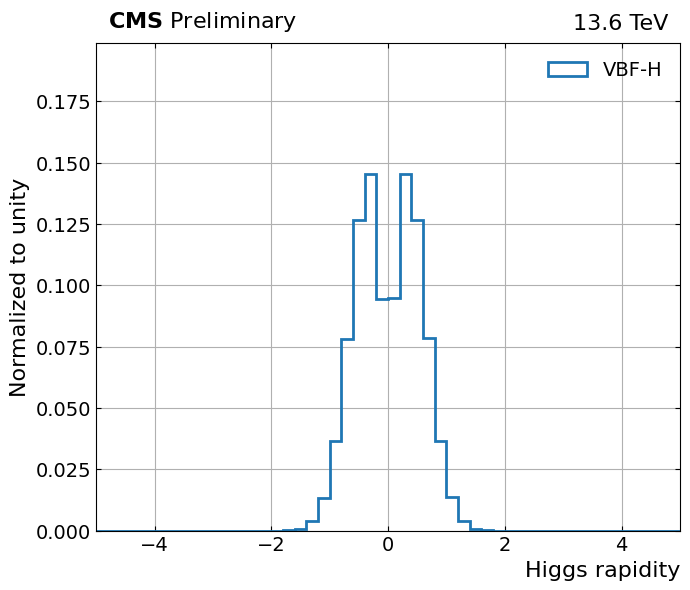

In [78]:
labels = {
    'higgs_pt':  r'$p_{T}$ [GeV]',
    'higgs_eta': r'Higgs rapidity',
    'higgs_phi': r'$\phi$ [rad]',
    'higgs_en':  r'$E$ [GeV]',
    'higgs_mbb': r'$m_{b\bar{b}}$ [GeV]'
}


plot_cms_hist(eta_to_rapidity(vbf_np_array['higgs_eta'],vbf_np_array['higgs_pt']), nbins=50, hist_range=(-5,5),
              xlabel=labels['higgs_eta'], legend_label='VBF-H', varname='higgs_rapidity')

✅ Saved: vbf_kin_higgs_pt.png


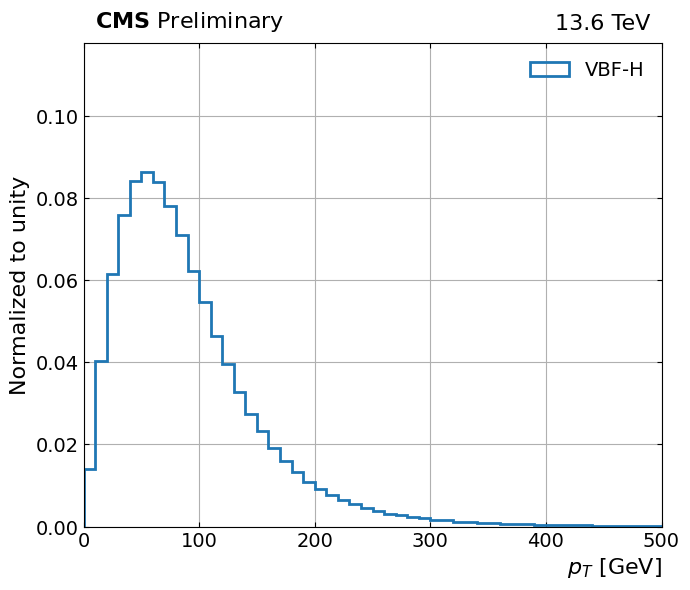

✅ Saved: vbf_kin_higgs_eta.png


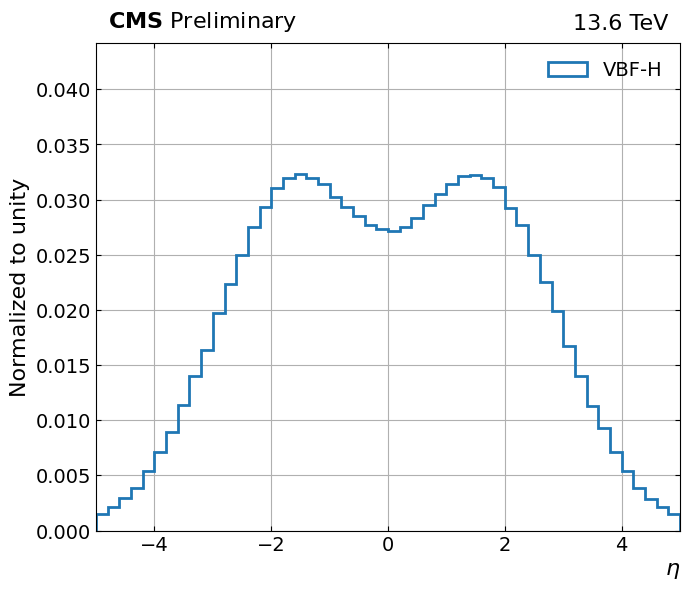

✅ Saved: vbf_kin_higgs_phi.png


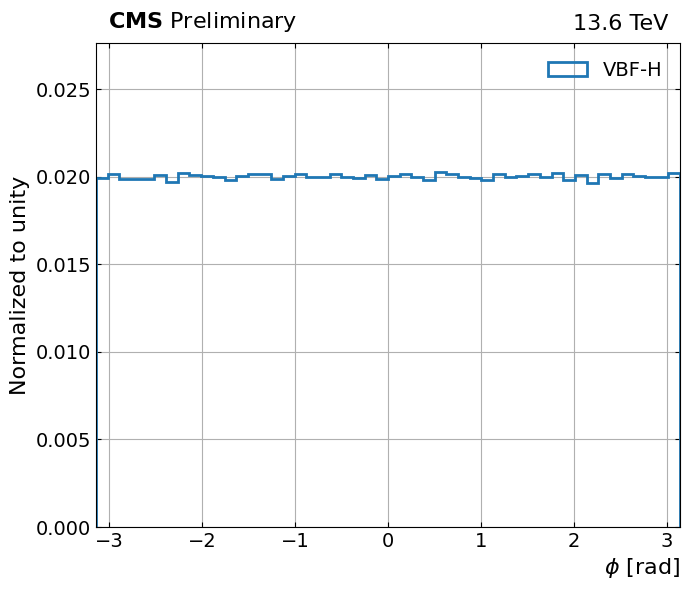

✅ Saved: vbf_kin_higgs_en.png


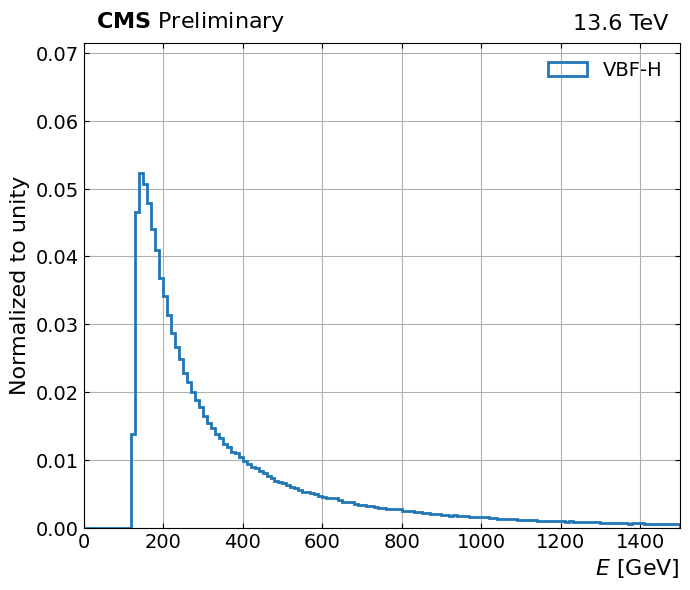

✅ Saved: vbf_kin_higgs_mbb.png


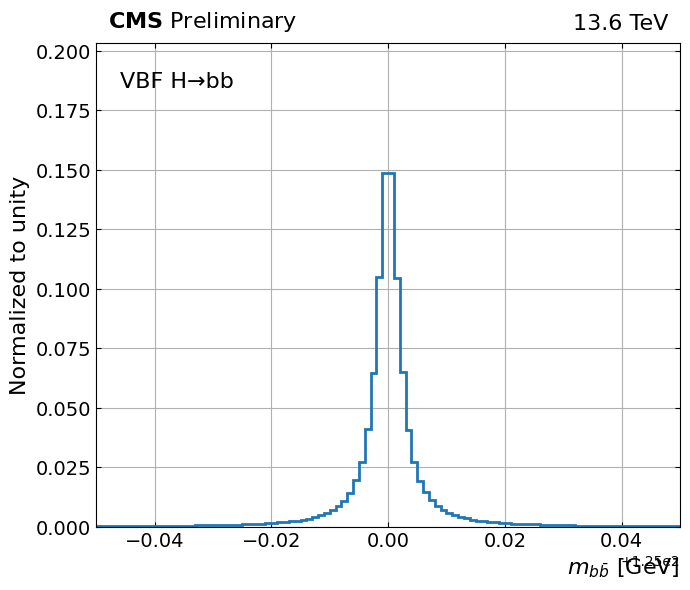

In [91]:
labels = {
    'higgs_pt':  r'$p_{T}$ [GeV]',
    'higgs_eta': r'$\eta$',
    'higgs_phi': r'$\phi$ [rad]',
    'higgs_en':  r'$E$ [GeV]',
    'higgs_mbb': r'$m_{b\bar{b}}$ [GeV]'
}

# Assuming you already have `vbf_np_array` loaded, e.g.
# vbf_np_array = np.load('vbf_variables.npz')
# For demonstration:
# vbf_np_array = { 'higgs_pt': ..., 'higgs_eta': ..., ... }

plot_cms_hist(vbf_np_array['higgs_pt'],  nbins=50, hist_range=(0,500),
              xlabel=labels['higgs_pt'], legend_label='VBF-H', varname='higgs_pt')

plot_cms_hist(vbf_np_array['higgs_eta'], nbins=50, hist_range=(-5,5),
              xlabel=labels['higgs_eta'], legend_label='VBF-H', varname='higgs_eta')

plot_cms_hist(vbf_np_array['higgs_phi'], nbins=50, hist_range=(-np.pi,np.pi),
              xlabel=labels['higgs_phi'], legend_label='VBF-H', varname='higgs_phi')

plot_cms_hist(vbf_np_array['higgs_en'], nbins=150, hist_range=(0,1500),
              xlabel=labels['higgs_en'], legend_label='VBF-H', varname='higgs_en')

plot_cms_hist(vbf_np_array['higgs_mbb'], nbins=100, hist_range=(124.95,125.05),
              xlabel=labels['higgs_mbb'], legend_label='', varname='higgs_mbb',process_tag='VBF H→bb')


✅ Saved: vbf_kin_detabbbar.png


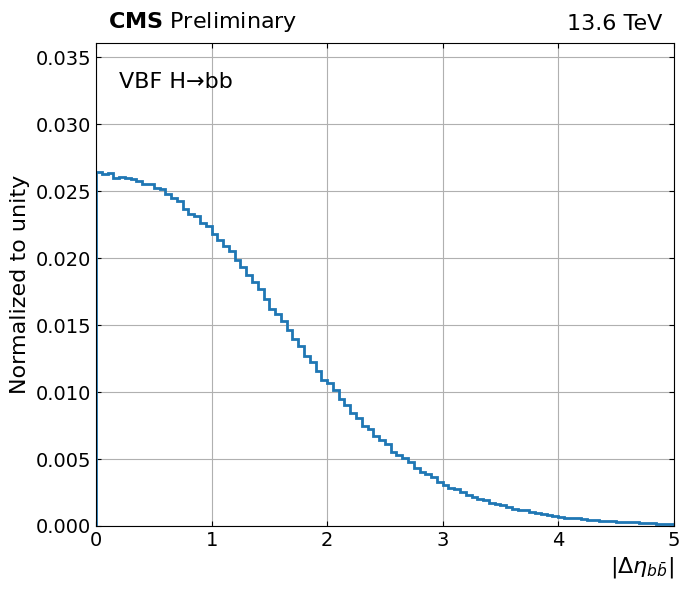

✅ Saved: vbf_kin_dphibbbar.png


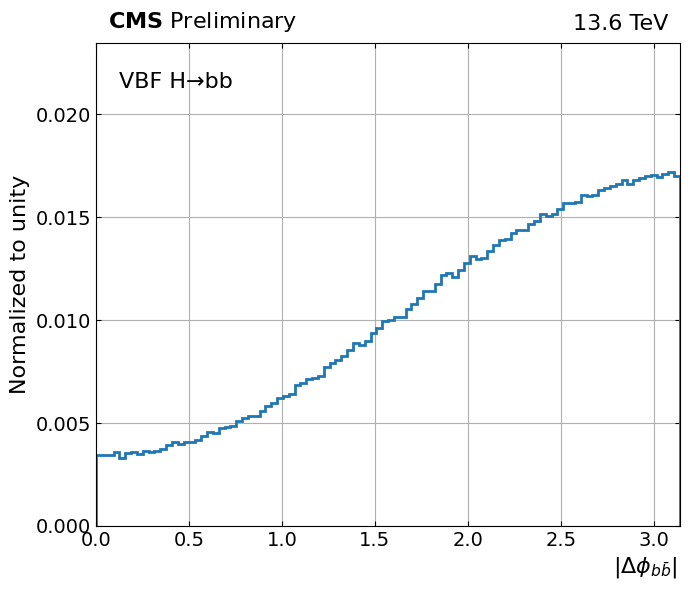

✅ Saved: vbf_kin_detaq1q2.png


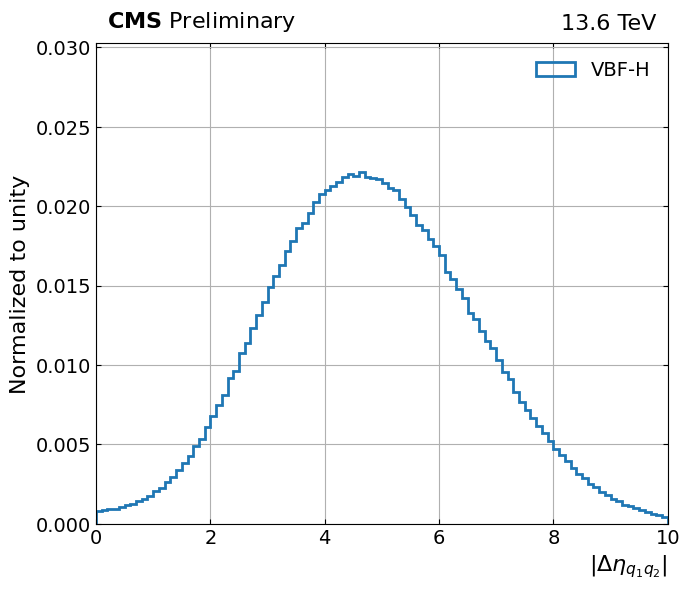

✅ Saved: vbf_kin_dphiq1q2.png


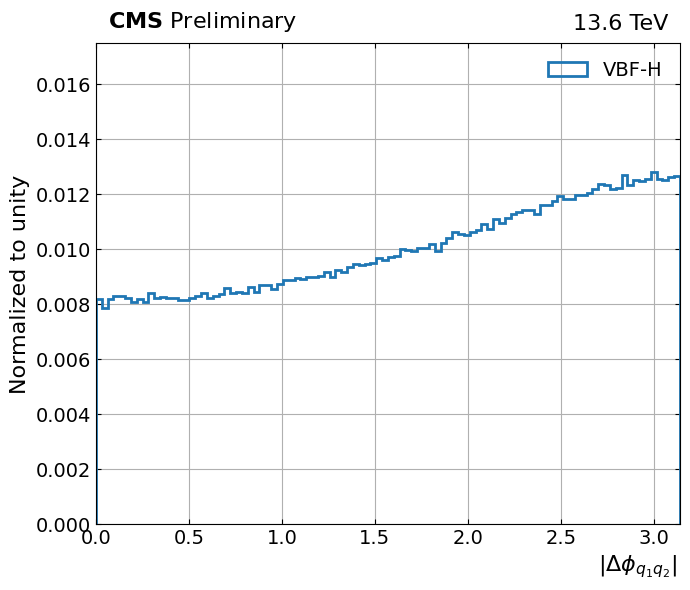

✅ Saved: vbf_kin_mq1q2.png


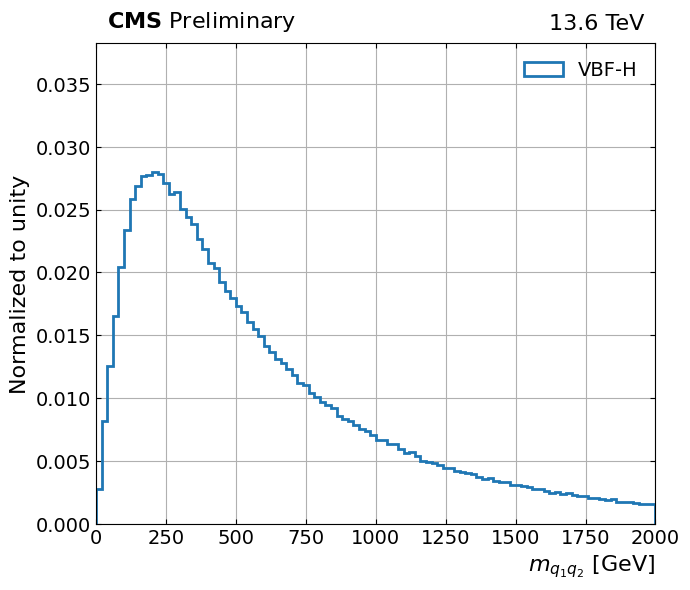

In [67]:
# -------------------------------------------------------------
# Define LaTeX labels for new variables
# -------------------------------------------------------------
# Update LaTeX labels for variables (with absolute values where appropriate)
labels.update({
    'detabbbar': r'$|\Delta\eta_{b\bar{b}}|$',
    'dphibbbar': r'$|\Delta\phi_{b\bar{b}}|$ ',
    'dpt':       r'$|\Delta p_{T}|$ [GeV]',
    'detaq1q2':  r'$|\Delta\eta_{q_{1}q_{2}}|$',
    'dphiq1q2':  r'$|\Delta\phi_{q_{1}q_{2}}|$ ',
    'mq1q2':     r'$m_{q_{1}q_{2}}$ [GeV]'
})


# -------------------------------------------------------------
# Plot each variable using the CMS-style function
# -------------------------------------------------------------

plot_cms_hist(vbf_np_array['detabbbar'], nbins=100, hist_range=(0,5),
              xlabel=labels['detabbbar'], legend_label='', varname='detabbbar',process_tag='VBF H→bb')

plot_cms_hist(vbf_np_array['dphibbbar'], nbins=100, hist_range=(0,np.pi),
              xlabel=labels['dphibbbar'], legend_label='', varname='dphibbbar',process_tag='VBF H→bb')

#plot_cms_hist(vbf_np_array['dpt'], nbins=100, hist_range=(0,500),
#              xlabel=labels['dpt'], legend_label='VBF-H', varname='dpt')

plot_cms_hist(vbf_np_array['detaq1q2'], nbins=100, hist_range=(0,10),
              xlabel=labels['detaq1q2'], legend_label='VBF-H', varname='detaq1q2')

plot_cms_hist(vbf_np_array['dphiq1q2'], nbins=100, hist_range=(0,np.pi),
              xlabel=labels['dphiq1q2'], legend_label='VBF-H', varname='dphiq1q2')

plot_cms_hist(vbf_np_array['mq1q2'], nbins=100, hist_range=(0,2000),
              xlabel=labels['mq1q2'], legend_label='VBF-H', varname='mq1q2')


In [84]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cms_hist(data, nbins, hist_range, xlabel, legend_label, varname=None,
                  colors=None, save=True, process_tag=None):
    """
    Plot CMS-style normalized histogram(s). Can plot multiple arrays in one frame.

    Parameters
    ----------
    data : np.ndarray or list of np.ndarray
        Data array(s) to histogram.
    nbins : int
        Number of bins.
    hist_range : tuple
        (min, max) histogram range.
    xlabel : str
        X-axis label (LaTeX ok).
    legend_label : str or list of str
        Legend entry (or list for multiple histograms).
    varname : str, optional
        Used for naming saved file.
    colors : list, optional
        List of colors for each histogram.
    save : bool, optional
        Whether to save figure.
    process_tag : str, optional
        Optional physics process tag (e.g., 'VBF H→bb').
    """

    # If single array, convert to list
    if isinstance(data, np.ndarray):
        data = [data]
    if isinstance(legend_label, str):
        legend_label = [legend_label]
    if colors is None:
        # default matplotlib color cycle
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # repeat colors if fewer than data arrays
    if len(colors) < len(data):
        colors = colors * (len(data) // len(colors) + 1)

    fig, ax = plt.subplots(figsize=(7,6))

    # Loop over all datasets
    for i, d in enumerate(data):
        counts, bins = np.histogram(d, bins=nbins, range=hist_range)
        bin_width = bins[1] - bins[0]
        if np.sum(counts) > 0:
            counts = counts / (np.sum(counts))  # normalize to unit area
        ax.hist(bins[:-1], bins=bins, weights=counts, histtype='step',
                linewidth=2, color=colors[i], label=legend_label[i])

    # Axis labels
    ax.set_xlabel(xlabel, fontsize=16, loc='right')
    ax.set_ylabel('Normalized to unity', fontsize=16)

    # CMS text
    ax.text(0.02, 1.02, r'$\bf{CMS}$ Preliminary', transform=ax.transAxes, fontsize=16, va='bottom', ha='left')
    ax.text(0.98, 1.02, r'13.6 TeV', transform=ax.transAxes, fontsize=16, va='bottom', ha='right')

    # Optional process tag
    if process_tag:
        ax.text(0.04, 0.90, process_tag, transform=ax.transAxes,
                fontsize=16, va='bottom', ha='left', color='black')

    # Legend
    
    ax.legend(frameon=False, fontsize=14)

    # Styling
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True, labelsize=14)
    ax.set_xlim(hist_range)
    ax.set_ylim(0, ax.get_ylim()[1]*1.3)
    ax.grid(True)

    plt.tight_layout()

    # Save
    if save and varname is not None:
        fname_pdf = f"vbf_kin_{varname}.pdf"
        plt.savefig(fname_pdf)
        fname_png = f"vbf_kin_{varname}.png"
        plt.savefig(fname_png)
        print(f"✅ Saved: {fname_pdf}, {fname_png}")

    plt.show()


✅ Saved: vbf_kin_pt_comparison.pdf, vbf_kin_pt_comparison.png


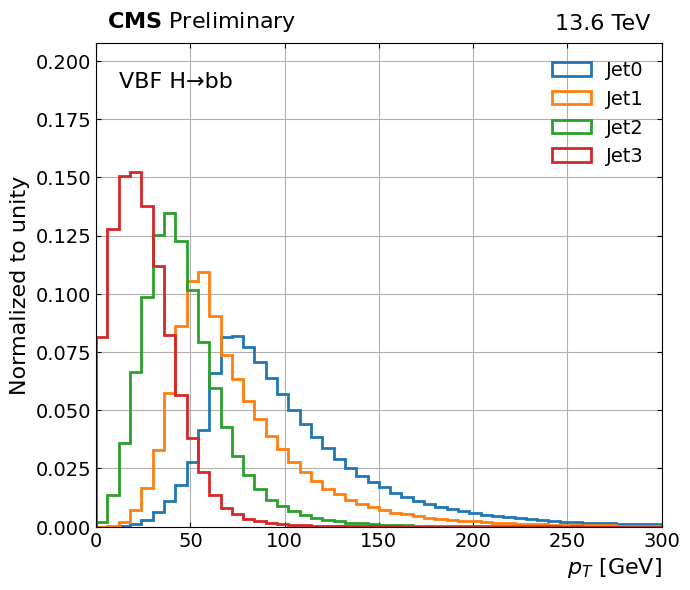

In [71]:
data_list = [vbf_np_array['pt0_pt'],
             vbf_np_array['pt1_pt'],
             vbf_np_array['pt2_pt'],
             vbf_np_array['pt3_pt']]

legend_list = ['Jet0', 'Jet1', 'Jet2', 'Jet3']

plot_cms_hist(data=data_list, nbins=50, hist_range=(0,300),
              xlabel=r'$p_T$ [GeV]', legend_label=legend_list,
              varname='pt_comparison', process_tag='VBF H→bb')


✅ Saved: vbf_kin_pt_q1q2bbbar.pdf, vbf_kin_pt_q1q2bbbar.png


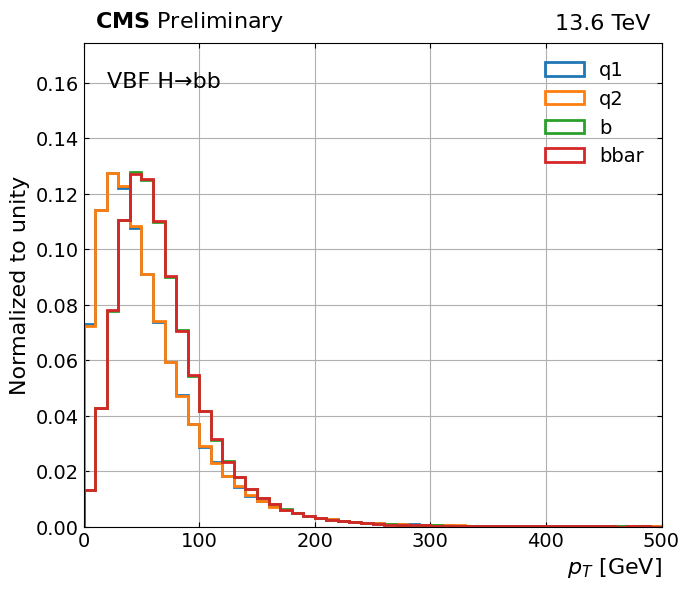

✅ Saved: vbf_kin_eta_q1q2bbbar.pdf, vbf_kin_eta_q1q2bbbar.png


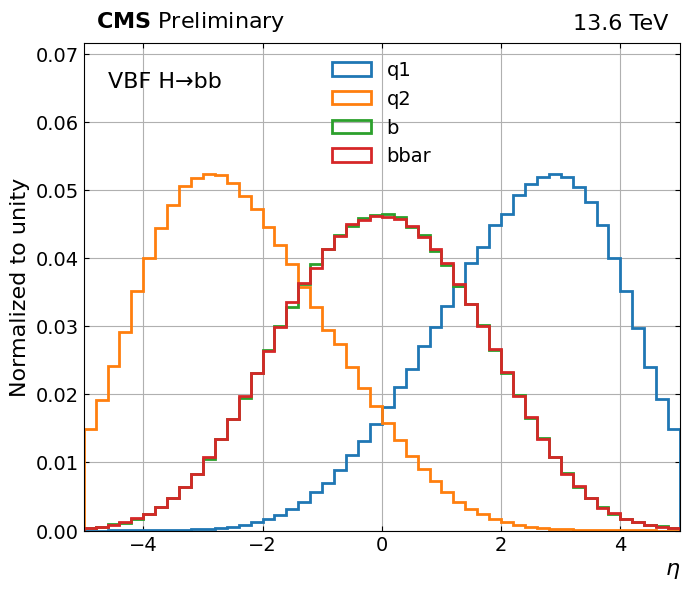

✅ Saved: vbf_kin_phi_q1q2bbbar.pdf, vbf_kin_phi_q1q2bbbar.png


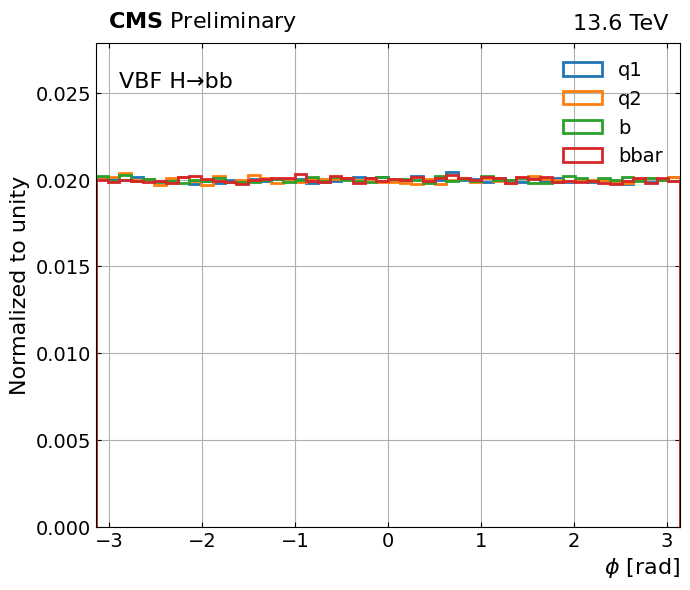

In [72]:
# -------------------------------
# pt comparison: q1, q2, b, bbar
# -------------------------------
data_list_pt = [vbf_np_array['q1_pt'],
                vbf_np_array['q2_pt'],
                vbf_np_array['b_pt'],
                vbf_np_array['bbar_pt']]

legend_list_pt = ['q1', 'q2', 'b', 'bbar']

plot_cms_hist(data=data_list_pt, nbins=50, hist_range=(0,500),
              xlabel=r'$p_T$ [GeV]', legend_label=legend_list_pt,
              varname='pt_q1q2bbbar', process_tag='VBF H→bb')


# -------------------------------
# eta comparison: q1, q2, b, bbar
# -------------------------------
data_list_eta = [vbf_np_array['q1_eta'],
                 vbf_np_array['q2_eta'],
                 vbf_np_array['b_eta'],
                 vbf_np_array['bbar_eta']]

legend_list_eta = ['q1', 'q2', 'b', 'bbar']

plot_cms_hist(data=data_list_eta, nbins=50, hist_range=(-5,5),
              xlabel=r'$\eta$', legend_label=legend_list_eta,
              varname='eta_q1q2bbbar', process_tag='VBF H→bb')


# -------------------------------
# phi comparison: q1, q2, b, bbar
# -------------------------------
data_list_phi = [vbf_np_array['q1_phi'],
                 vbf_np_array['q2_phi'],
                 vbf_np_array['b_phi'],
                 vbf_np_array['bbar_phi']]

legend_list_phi = ['q1', 'q2', 'b', 'bbar']

plot_cms_hist(data=data_list_phi, nbins=50, hist_range=(-np.pi, np.pi),
              xlabel=r'$\phi$ [rad]', legend_label=legend_list_phi,
              varname='phi_q1q2bbbar', process_tag='VBF H→bb')


In [81]:
import numpy as np

# Stack pt arrays and find order
b_pts = np.array([vbf_np_array['b_pt'], vbf_np_array['bbar_pt']])
b_etas = np.array([vbf_np_array['b_eta'], vbf_np_array['bbar_eta']])
b_phis = np.array([vbf_np_array['b_phi'], vbf_np_array['bbar_phi']])

# indices of sorted pt (descending)
b_order = np.argsort(b_pts, axis=0)[::-1]  # descending

# leading and subleading pt
b_lead_pt = b_pts[b_order[0], np.arange(b_pts.shape[1])]
b_sublead_pt = b_pts[b_order[1], np.arange(b_pts.shape[1])]

# corresponding eta and phi
b_lead_eta = b_etas[b_order[0], np.arange(b_pts.shape[1])]
b_sublead_eta = b_etas[b_order[1], np.arange(b_pts.shape[1])]

b_lead_phi = b_phis[b_order[0], np.arange(b_pts.shape[1])]
b_sublead_phi = b_phis[b_order[1], np.arange(b_pts.shape[1])]


In [82]:
q_pts = np.array([vbf_np_array['q1_pt'], vbf_np_array['q2_pt']])
q_etas = np.array([vbf_np_array['q1_eta'], vbf_np_array['q2_eta']])
q_phis = np.array([vbf_np_array['q1_phi'], vbf_np_array['q2_phi']])

q_order = np.argsort(q_pts, axis=0)[::-1]

q_lead_pt = q_pts[q_order[0], np.arange(q_pts.shape[1])]
q_sublead_pt = q_pts[q_order[1], np.arange(q_pts.shape[1])]

q_lead_eta = q_etas[q_order[0], np.arange(q_pts.shape[1])]
q_sublead_eta = q_etas[q_order[1], np.arange(q_pts.shape[1])]

q_lead_phi = q_phis[q_order[0], np.arange(q_pts.shape[1])]
q_sublead_phi = q_phis[q_order[1], np.arange(q_pts.shape[1])]


✅ Saved: vbf_kin_pt_leadjets.pdf, vbf_kin_pt_leadjets.png


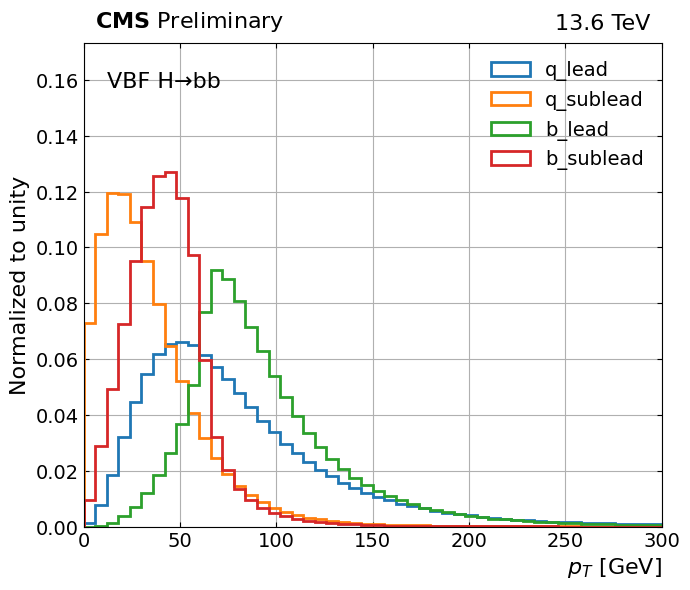

✅ Saved: vbf_kin_eta_leadjets.pdf, vbf_kin_eta_leadjets.png


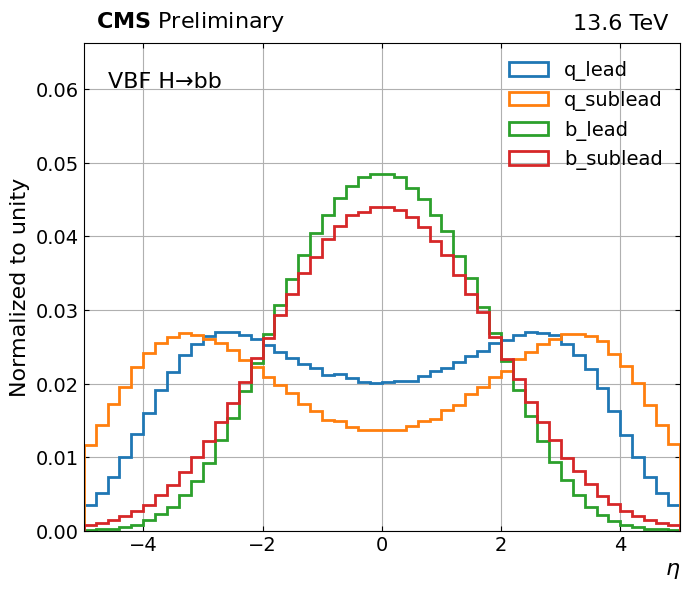

✅ Saved: vbf_kin_phi_leadjets.pdf, vbf_kin_phi_leadjets.png


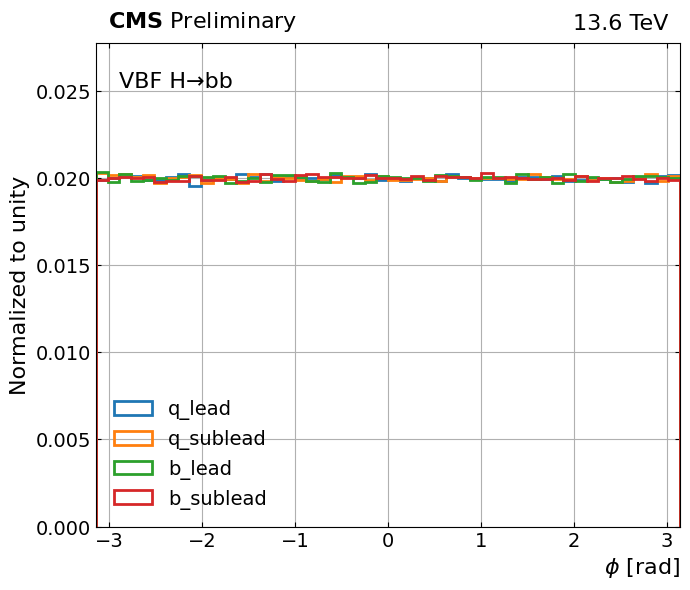

In [86]:
# Leading/Subleading arrays (already computed)
# q_lead_pt, q_sublead_pt, q_lead_eta, q_sublead_eta, q_lead_phi, q_sublead_phi
# b_lead_pt, b_sublead_pt, b_lead_eta, b_sublead_eta, b_lead_phi, b_sublead_phi

# -------------------------------
# pt comparison
# -------------------------------
data_list_pt = [q_lead_pt, q_sublead_pt, b_lead_pt, b_sublead_pt]
legend_list_pt = ['q_lead', 'q_sublead', 'b_lead', 'b_sublead']

plot_cms_hist(data=data_list_pt, nbins=50, hist_range=(0,300),
              xlabel=r'$p_T$ [GeV]', legend_label=legend_list_pt,
              varname='pt_leadjets', process_tag='VBF H→bb')

# -------------------------------
# eta comparison
# -------------------------------
data_list_eta = [q_lead_eta, q_sublead_eta, b_lead_eta, b_sublead_eta]
legend_list_eta = ['q_lead', 'q_sublead', 'b_lead', 'b_sublead']

plot_cms_hist(data=data_list_eta, nbins=50, hist_range=(-5,5),
              xlabel=r'$\eta$', legend_label=legend_list_eta,
              varname='eta_leadjets', process_tag='VBF H→bb')

# -------------------------------
# phi comparison
# -------------------------------
data_list_phi = [q_lead_phi, q_sublead_phi, b_lead_phi, b_sublead_phi]
legend_list_phi = ['q_lead', 'q_sublead', 'b_lead', 'b_sublead']

plot_cms_hist(data=data_list_phi, nbins=50, hist_range=(-np.pi, np.pi),
              xlabel=r'$\phi$ [rad]', legend_label=legend_list_phi,
              varname='phi_leadjets', process_tag='VBF H→bb')
